<a href="https://colab.research.google.com/github/belogabriel/pandas_lib/blob/main/DELIV2_WALMART_GABRIELBELO_29975.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO - *WALMART*
### DELIVERABLE 2

## GABRIEL BELO #29975 (DEX05)

In [ ]:
# importando libs que serão utilizadas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importando dataset e primeiras impressões.
df = pd.read_csv('/content/Walmart.csv')
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [ ]:
# alterando a data de object para datetime facilitando operações com a mesma.
df['Date']= pd.to_datetime(df['Date'], format='%Y-%m-%d' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.sort_values(['Weekly_Sales'], ascending=False).groupby(['Store']).head(10)
# Podemos observar abaixo as lojas com maiores weekly sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
...,...,...,...,...,...,...,...,...
4594,33,2010-11-06,310800.79,0,93.52,3.057,126.111903,9.849
4586,33,2010-04-16,307779.64,0,72.44,3.109,126.562100,9.849
4598,33,2010-09-07,302423.93,0,95.88,3.100,126.151800,9.495
4707,33,2012-10-08,297753.49,0,100.07,3.811,130.756161,7.147


In [ ]:
df.describe().round() # Média de vendas semanais = 1046965.0

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0
mean,23.0,1046965.0,0.0,61.0,3.0,172.0,8.0
std,13.0,564367.0,0.0,18.0,0.0,39.0,2.0
min,1.0,209986.0,0.0,-2.0,2.0,126.0,4.0
25%,12.0,553350.0,0.0,47.0,3.0,132.0,7.0
50%,23.0,960746.0,0.0,63.0,3.0,183.0,8.0
75%,34.0,1420159.0,0.0,75.0,4.0,213.0,9.0
max,45.0,3818686.0,1.0,100.0,4.0,227.0,14.0


In [ ]:
storedf = df.groupby('Store').agg({'Weekly_Sales':['max', 'min', 'mean']}).round(2)
storedf.Weekly_Sales['mean']>=1046965.0 #lojas que ultrapassam a média de vendas.

Store
1      True
2      True
3     False
4      True
5     False
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14     True
15    False
16    False
17    False
18     True
19     True
20     True
21    False
22    False
23     True
24     True
25    False
26    False
27     True
28     True
29    False
30    False
31     True
32     True
33    False
34    False
35    False
36    False
37    False
38    False
39     True
40    False
41     True
42    False
43    False
44    False
45    False
Name: mean, dtype: bool

In [ ]:
sales_mean = df.groupby(['Store'])['Weekly_Sales'].mean().round(1).sort_values(ascending = False)
sales_mean # Média/loja

Store
20    2107676.9
4     2094713.0
14    2020978.4
13    2003620.3
2     1925751.3
10    1899424.6
27    1775216.2
6     1564728.2
1     1555264.4
39    1450668.1
19    1444999.0
31    1395901.4
23    1389864.5
24    1356755.4
11    1356383.1
28    1323522.2
41    1268125.4
32    1166568.2
18    1084718.4
22    1028501.0
12    1009001.6
26    1002911.8
34     966781.6
40     964128.0
35     919725.0
8      908749.5
17     893581.4
45     785981.4
21     756069.1
25     706721.5
43     633324.7
15     623312.5
7      570617.3
42     556403.9
9      543980.6
29     539451.4
16     519247.7
37     518900.3
30     438579.6
3      402704.4
38     385731.7
36     373512.0
5      318011.8
44     302748.9
33     259861.7
Name: Weekly_Sales, dtype: float64

In [ ]:
result = df.groupby('Store').agg({'Weekly_Sales': ['mean', 'min', 'max']})
print(result)
result.max()
# Podemos perceber que de todos os periodos a loja que manteve a melhor média foi a de numero 20.

       Weekly_Sales                        
               mean         min         max
Store                                      
1      1.555264e+06  1316899.31  2387950.20
2      1.925751e+06  1650394.44  3436007.68
3      4.027044e+05   339597.38   605990.41
4      2.094713e+06  1762539.30  3676388.98
5      3.180118e+05   260636.71   507900.07
6      1.564728e+06  1261253.18  2727575.18
7      5.706173e+05   372673.61  1059715.27
8      9.087495e+05   772539.12  1511641.09
9      5.439806e+05   452905.22   905324.68
10     1.899425e+06  1627707.31  3749057.69
11     1.356383e+06  1100418.69  2306265.36
12     1.009002e+06   802105.50  1768249.89
13     2.003620e+06  1633663.12  3595903.20
14     2.020978e+06  1479514.66  3818686.45
15     6.233125e+05   454183.42  1368318.17
16     5.192477e+05   368600.00  1004730.69
17     8.935814e+05   635862.55  1309226.79
18     1.084718e+06   540922.94  2027507.15
19     1.444999e+06  1181204.53  2678206.42
20     2.107677e+06  1761016.51 

Weekly_Sales  mean    2.107677e+06
              min     1.762539e+06
              max     3.818686e+06
dtype: float64

In [ ]:
df[df.Weekly_Sales >= 1046965.0].sort_values('Weekly_Sales', ascending=False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
...,...,...,...,...,...,...,...,...
3477,25,2010-12-17,1047707.59,0,21.60,3.140,204.632119,7.484
4824,34,2012-10-02,1047658.09,1,36.70,3.411,130.384903,9.653
2550,18,2012-05-18,1047444.59,0,62.31,3.899,138.106581,8.304
3123,22,2012-05-25,1047297.38,0,62.39,3.850,142.103278,7.671


In [ ]:
df[df.Store == 4 ].agg({'Weekly_Sales': ['mean', 'min', 'max']}) #Analisando resultados de venda da loja 4

,Weekly_Sales
mean,2.094713e+06
min,1.762539e+06
max,3.676389e+06


In [ ]:
df[df.Store == 20 ].agg({'Weekly_Sales': ['mean', 'min', 'max']}) #Analisando resultados de venda da loja 20

,Weekly_Sales
mean,2.107677e+06
min,1.761017e+06
max,3.766687e+06


In [ ]:
wal20 = df[df['Store']==20] # filtro loja 20
abovemean = wal20[(wal20['Weekly_Sales']) > 1046964.8775617732 ] # vendas da loja 20 acima da média
abovemean.sort_values(by= 'Weekly_Sales', ascending = False).round(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2763,20,2010-12-24,3766687.43,0,25.17,3.14,204.64,7.48
2815,20,2011-12-23,3555371.03,0,40.19,3.39,212.24,7.08
2811,20,2011-11-25,2906233.25,1,46.38,3.49,211.41,7.08
2762,20,2010-12-17,2819193.17,0,24.07,3.14,204.63,7.48
2759,20,2010-11-26,2811634.04,1,46.66,3.04,204.96,7.48
...,...,...,...,...,...,...,...,...
2764,20,2010-12-31,1799737.79,1,28.85,3.18,204.64,7.48
2750,20,2010-09-24,1789687.65,0,69.37,2.71,204.82,7.53
2767,20,2011-01-21,1781805.66,0,27.43,3.23,205.05,7.34
2768,20,2011-01-28,1761506.68,0,23.21,3.24,205.39,7.34


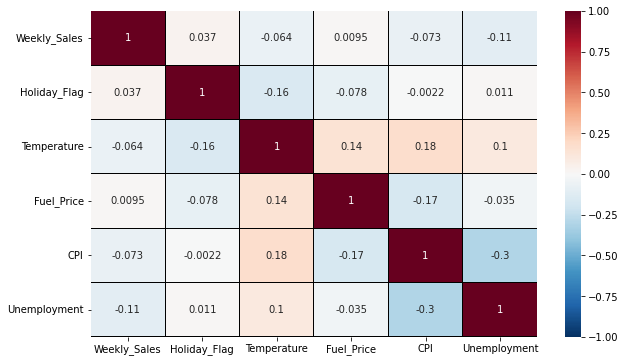

In [ ]:
# Avaliando correlações entre as colunas do dataset

columns = df[['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
                         'CPI', 'Unemployment']]
varcorr = columns.corr()

plt.figure(figsize=[10, 6])
sns.heatmap(data=varcorr, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)

plt.show()

# Percebe-se, pelos valores, que a correlação entre colunas é desprezivel.

# RECOMENDAÇÃO

## Com base nos estudos efetuados a cima, pode-se perceber que **a loja com melhores resultados é a de número 20**. Logo, esta é minha recomendação para investimento.
